In [613]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np  
import seaborn as sns

# (1) 原因：是否分配到司机，个人或系统取消

In [614]:
data_orders = pd.read_csv('datasets/data_orders.csv')
data_orders.head()

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
0,18:08:07,-0.978916,51.456173,60.0,3000583041974,4,1,198.0
1,20:57:32,-0.950385,51.456843,NaN,3000583116437,4,0,128.0
2,12:07:50,-0.969520,51.455544,477.0,3000582891479,4,1,46.0
3,13:50:20,-1.054671,51.460544,658.0,3000582941169,4,1,62.0
4,21:24:45,-0.967605,51.458236,NaN,3000583140877,9,0,NaN


In [615]:
# 系统取消，时间不一定为空；客户取消，时间可能空可能不空
data_orders[(data_orders["order_status_key"] == 9) & ~(data_orders["m_order_eta"].isnull())]

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
1158,16:49:55,-0.974337,51.465422,418.0,3000631256425,9,1,NaN
6881,00:44:03,-0.973348,51.453919,60.0,3000630156338,9,1,NaN
7968,00:12:02,-0.974735,51.454823,298.0,3000600112433,9,1,NaN


In [616]:
# 没有分配司机，则时间为空
data_orders[(data_orders["is_driver_assigned_key"] == 0) & ~(data_orders["m_order_eta"].isnull())]

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds


In [617]:
# 分配司机，则时间为一定不空
data_orders[(data_orders["is_driver_assigned_key"] == 1) & (data_orders["m_order_eta"].isnull())]

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds


In [618]:
# 分配司机，系统拒绝
data_orders[(data_orders["is_driver_assigned_key"] == 1) & (data_orders["order_status_key"] == 9)]

,order_datetime,origin_longitude,origin_latitude,m_order_eta,order_gk,order_status_key,is_driver_assigned_key,cancellations_time_in_seconds
1158,16:49:55,-0.974337,51.465422,418.0,3000631256425,9,1,NaN
6881,00:44:03,-0.973348,51.453919,60.0,3000630156338,9,1,NaN
7968,00:12:02,-0.974735,51.454823,298.0,3000600112433,9,1,NaN


/var/folders/8s/kqfnryp153nf9rvn2sd8v2fh0000gn/T/ipykernel_87883/1712934038.py:2: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_orders['order_datetime'] = pd.to_datetime(data_orders['order_datetime'])


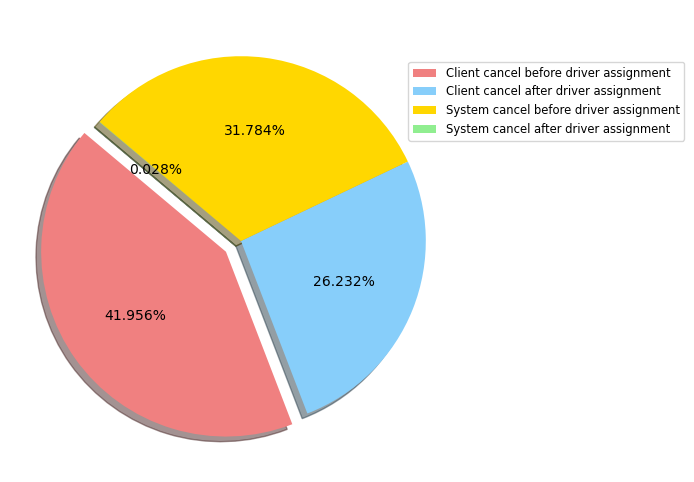

Driver not assigned, Client cancelled: 4496
Driver assigned, Client cancelled: 2811
Driver not assigned, System cancelled: 3406
Driver assigned, System cancelled: 3
Client cancel before driver assignment: 41.956%
Client cancel after driver assignment: 26.232%
System cancel before driver assignment: 31.784%
System cancel after driver assignment: 0.028%


In [619]:
# 将 order_datetime 列转换为 datetime 类型，并提取小时信息
data_orders['order_datetime'] = pd.to_datetime(data_orders['order_datetime'])
data_orders['hour'] = data_orders['order_datetime'].dt.hour

# 分类订单
cancelled_before_assignment_client = data_orders[(data_orders['order_status_key'] == 4) & (data_orders['is_driver_assigned_key'] == 0)] 
cancelled_after_assignment_client = data_orders[(data_orders['order_status_key'] == 4) & (data_orders['is_driver_assigned_key'] == 1)]
cancelled_before_assignment_system = data_orders[(data_orders['order_status_key'] == 9) & (data_orders['is_driver_assigned_key'] == 0)]
cancelled_after_assignment_system = data_orders[(data_orders['order_status_key'] == 9) & (data_orders['is_driver_assigned_key'] == 1)]

# 统计每个分类的订单数量
cancelled_before_assignment_client_count = cancelled_before_assignment_client.shape[0]
cancelled_after_assignment_client_count = cancelled_after_assignment_client.shape[0]
cancelled_before_assignment_system_count = cancelled_before_assignment_system.shape[0]
cancelled_after_assignment_system_count = cancelled_after_assignment_system.shape[0]

# 绘制分布图
labels = ['Client cancel before driver assignment', 'Client cancel after driver assignment', 'System cancel before driver assignment', 'System cancel after driver assignment']
# labels = ['Driver not assigned, Client cancelled', 'Driver assigned, Client cancelled', 'Driver not assigned, System cancelled', 'Driver assigned, System cancelled']
sizes = [cancelled_before_assignment_client_count, cancelled_after_assignment_client_count, cancelled_before_assignment_system_count, cancelled_after_assignment_system_count]
colors = ['lightcoral', 'lightskyblue', 'gold', 'lightgreen']
explode = (0.1, 0, 0, 0)  # 突出显示第一部分

plt.figure(figsize=(8, 6))
# 绘制饼图
patches, _, _ = plt.pie(sizes, explode=explode, colors=colors, autopct='%.3f%%', shadow=True, startangle=140)

# 创建图例并将位置调整为图的外部
# plt.legend(patches, labels, loc="upper left", bbox_to_anchor=(1, 0.5), fontsize="small")
plt.legend(patches, labels, loc="upper left", bbox_to_anchor=(0.85, 0.9), fontsize="small")


# plt.title('Distribution of Orders by Failure Reasons')

plt.savefig('image/1_distribution_of_orders.png',bbox_inches='tight')
plt.show()



# 打印每个分类的订单数量
print("Driver not assigned, Client cancelled:", cancelled_before_assignment_client_count)
print("Driver assigned, Client cancelled:", cancelled_after_assignment_client_count)
print("Driver not assigned, System cancelled:", cancelled_before_assignment_system_count)
print("Driver assigned, System cancelled:", cancelled_after_assignment_system_count)

# 打印每部分比例
total_orders = sum(sizes)
for label, size in zip(labels, sizes):
    percentage = (size / total_orders) * 100
    print(f"{label}: {percentage:.3f}%")



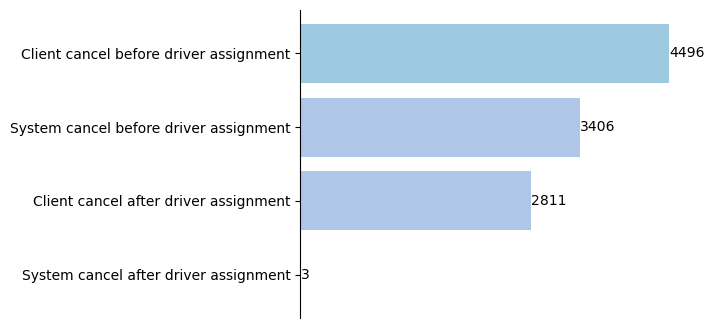

In [620]:
# 排序
sorted_indices = sorted(range(len(sizes)), key=lambda i: sizes[i])
sorted_labels = [labels[i] for i in sorted_indices]
sorted_sizes = [sizes[i] for i in sorted_indices]

# 绘制条形图
plt.figure(figsize=(5, 4))
bars = plt.barh(sorted_labels, sorted_sizes, color=['#9ecae1' if i == sorted_indices[0] else '#aec7e8' for i in range(len(sorted_sizes))])

# 在条形上标记数字
for bar, size in zip(bars, sorted_sizes):
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, size, ha='left', va='center', fontsize=10)

# 去除上、下、右边框
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)

# 去除 x 轴
plt.gca().axes.get_xaxis().set_visible(False)

plt.xlabel('Number of Orders')
plt.grid(False)  # 去除网格
# plt.title('Distribution of Orders by Failure Reasons (Sorted)')
plt.savefig('image/1_bar_chart_distribution_of_orders.png', bbox_inches='tight')
plt.show()




# (2) 随时间的变化

In [621]:
# 将 order_datetime 列转换为 datetime 类型，并提取小时信息
# data_orders['order_datetime'] = pd.to_datetime(data_orders['order_datetime'])
# data_orders['hour'] = data_orders['order_datetime'].dt.hour


# 统计每个小时的订单数量
orders_by_hour = data_orders.groupby('hour').size()

# 统计每个小时各自订单数量
orders_by_hour_cancelled_before_client = cancelled_before_assignment_client.groupby('hour').size()
orders_by_hour_cancelled_after_client = cancelled_after_assignment_client.groupby('hour').size()
orders_by_hour_cancelled_before_system = cancelled_before_assignment_system.groupby('hour').size()
orders_by_hour_cancelled_after_system = cancelled_after_assignment_system.groupby('hour').size()

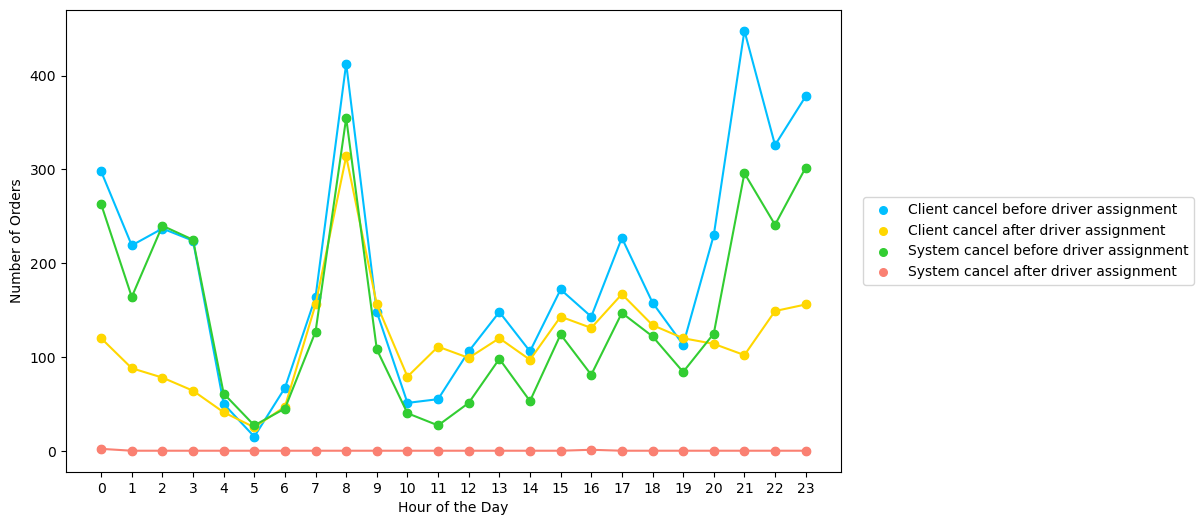

In [622]:
# 补充缺失小时的订单数量为0
hours = range(24)
orders_by_hour_cancelled_before_client = orders_by_hour_cancelled_before_client.reindex(hours, fill_value=0)
orders_by_hour_cancelled_after_client = orders_by_hour_cancelled_after_client.reindex(hours, fill_value=0)
orders_by_hour_cancelled_before_system = orders_by_hour_cancelled_before_system.reindex(hours, fill_value=0)
orders_by_hour_cancelled_after_system = orders_by_hour_cancelled_after_system.reindex(hours, fill_value=0)

# 绘制柱状图
plt.figure(figsize=(10, 6))

# 绘制散点图
plt.scatter(orders_by_hour_cancelled_before_client.index, orders_by_hour_cancelled_before_client.values, label='Client cancel before driver assignment', color='deepskyblue', s=30)
plt.scatter(orders_by_hour_cancelled_after_client.index, orders_by_hour_cancelled_after_client.values, label='Client cancel after driver assignment', color='gold', s=30)  # 将橙色改成金色
plt.scatter(orders_by_hour_cancelled_before_system.index, orders_by_hour_cancelled_before_system.values, label='System cancel before driver assignment', color='limegreen', s=30)
plt.scatter(orders_by_hour_cancelled_after_system.index, orders_by_hour_cancelled_after_system.values, label='System cancel after driver assignment', color='salmon', s=30)


# 绘制折线图
plt.plot(orders_by_hour_cancelled_before_client.index, orders_by_hour_cancelled_before_client.values, color='deepskyblue', marker='o')
plt.plot(orders_by_hour_cancelled_after_client.index, orders_by_hour_cancelled_after_client.values, color='gold', marker='o')  # 将橙色改成金色
plt.plot(orders_by_hour_cancelled_before_system.index, orders_by_hour_cancelled_before_system.values, color='limegreen', marker='o')
plt.plot(orders_by_hour_cancelled_after_system.index, orders_by_hour_cancelled_after_system.values, color='salmon', marker='o')

plt.xlabel('Hour of the Day')
plt.ylabel('Number of Orders')
# plt.title('Distribution of Orders by Hours')
plt.xticks(range(24))
plt.legend(bbox_to_anchor=(1.02, 0.5), loc='center left')  # 图例位置自动调整位置
plt.grid(False)  # 去除网格
plt.savefig('image/2_line_chart_distribution_of_orders.png', bbox_inches='tight')
plt.show()

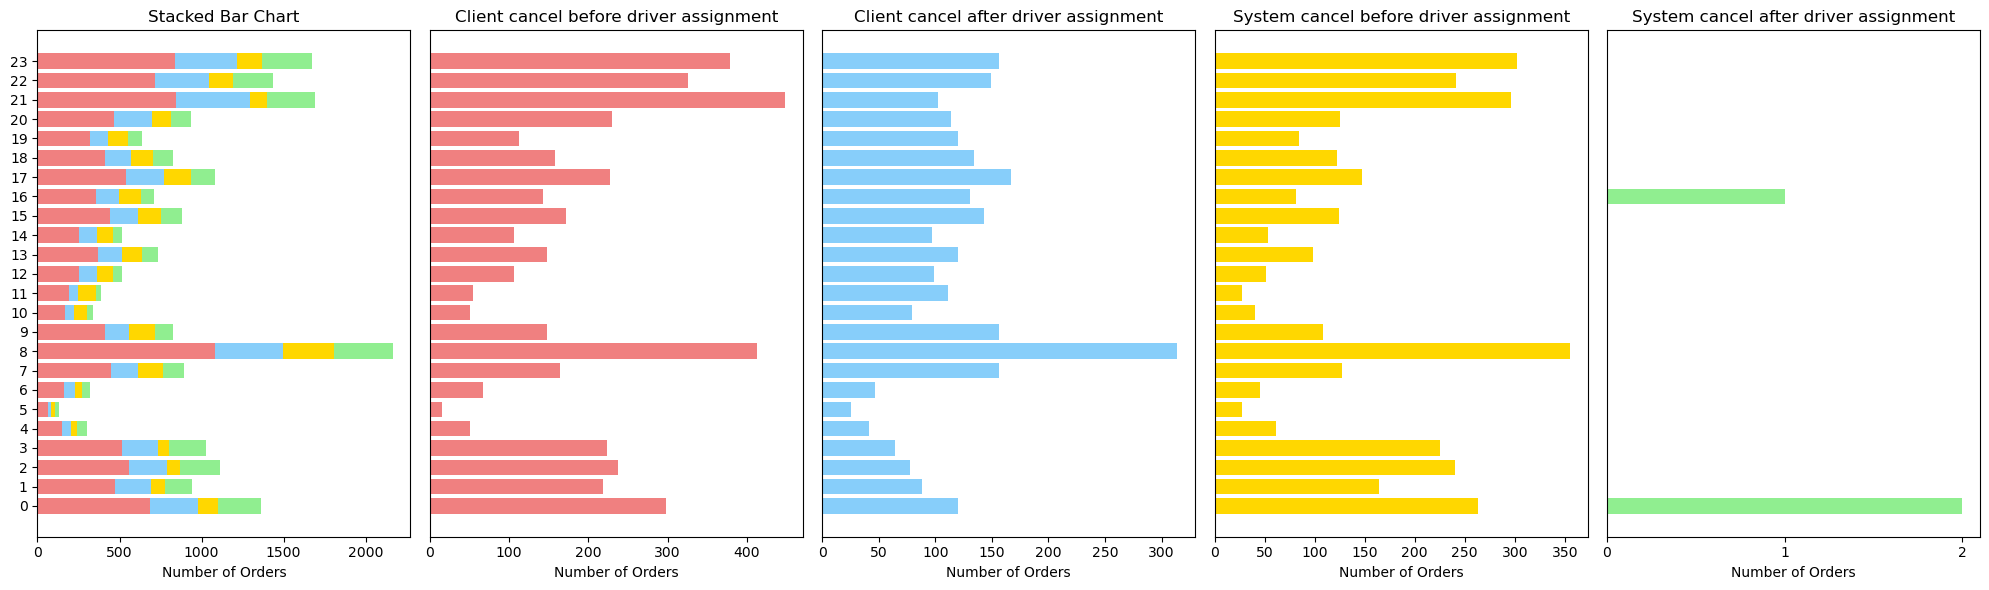

In [623]:
import matplotlib.pyplot as plt

# 设置图形的大小
plt.figure(figsize=(20, 6))

# 绘制总量的堆叠柱状图
plt.subplot(151)
total_orders = orders_by_hour.sum()
bottom = np.zeros(len(orders_by_hour))  # 底部初始化为0
colors = ['lightcoral', 'lightskyblue', 'gold', 'lightgreen']  # 指定的颜色
labels = ['Client cancel before driver assignment', 'Client cancel after driver assignment',
          'System cancel before driver assignment', 'System cancel after driver assignment']  # 图例标签
for i, (label, data) in enumerate(zip(labels, [orders_by_hour, orders_by_hour_cancelled_before_client,
                                               orders_by_hour_cancelled_after_client,
                                               orders_by_hour_cancelled_before_system,
                                               orders_by_hour_cancelled_after_system])):
    plt.barh(data.index, data, label=label, color=colors[i], left=bottom)
    bottom += data
plt.xlabel('Number of Orders')
plt.yticks(range(24))
plt.grid(False)  # 去除网格
plt.title('Stacked Bar Chart')

# plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), ncol=4)  # 图例位置调整

# 绘制取消前司机未分配的客户取消的柱状图
plt.subplot(152)
plt.barh(orders_by_hour_cancelled_before_client.index, orders_by_hour_cancelled_before_client, color=colors[0])
plt.xlabel('Number of Orders')
plt.title('Client cancel before driver assignment')
plt.grid(False)  # 去除网格
plt.gca().axes.get_yaxis().set_visible(False)  # 删除 y 轴坐

# 绘制取消后司机未分配的客户取消的柱状图
plt.subplot(153)
plt.barh(orders_by_hour_cancelled_after_client.index, orders_by_hour_cancelled_after_client, color=colors[1])
plt.xlabel('Number of Orders')
plt.title('Client cancel after driver assignment')
plt.grid(False)  # 去除网格
plt.gca().axes.get_yaxis().set_visible(False)  # 删除 y 轴坐

# 绘制取消前司机未分配的系统取消的柱状图
plt.subplot(154)
plt.barh(orders_by_hour_cancelled_before_system.index, orders_by_hour_cancelled_before_system, color=colors[2])
plt.xlabel('Number of Orders')
plt.title('System cancel before driver assignment')
plt.grid(False)  # 去除网格
plt.gca().axes.get_yaxis().set_visible(False)  # 删除 y 轴坐

# 绘制取消后司机未分配的系统取消的柱状图
plt.subplot(155)
plt.barh(orders_by_hour_cancelled_after_system.index, orders_by_hour_cancelled_after_system, color=colors[3])
plt.xlabel('Number of Orders')
plt.title('System cancel after driver assignment')
plt.grid(False)  # 去除网格
plt.xticks(range(3))
plt.gca().axes.get_yaxis().set_visible(False)  # 删除 y 轴坐


# 调整子图之间的间距
plt.tight_layout()

plt.savefig('image/2_bar_chart_distribution_of_orders.png', bbox_inches='tight')
# 显示图形
plt.show()


# (3) 有和无司机的取消时间

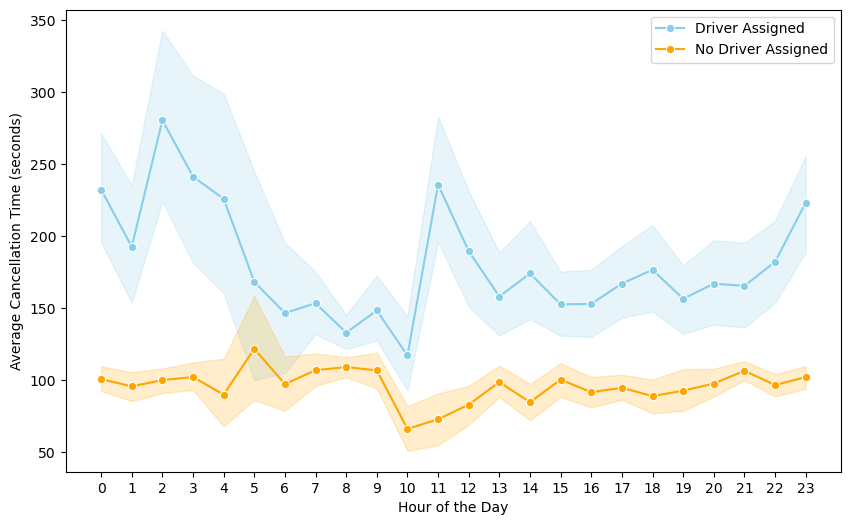

In [624]:
# 创建空的 DataFrame 用于存储处理后的数据（没有司机）
cleaned_data_without_driver = pd.DataFrame()
# 创建空的 DataFrame 用于存储处理后的数据（有司机）
cleaned_data_with_driver = pd.DataFrame()

for hour in range(24):
    for is_driver_assigned in [0, 1]:
        # 获取当前小时和是否有司机分配的数据
        current_hour_data = data_orders[(data_orders['hour'] == hour) & (data_orders['is_driver_assigned_key'] == is_driver_assigned)]
        
        # 计算取消时间的四分位数
        q1 = current_hour_data['cancellations_time_in_seconds'].quantile(0.25)
        q3 = current_hour_data['cancellations_time_in_seconds'].quantile(0.75)
        iqr = q3 - q1
        
        # 定义异常值的上下界
        upper_bound = q3 + 1.5 * iqr
        lower_bound = q1 - 1.5 * iqr
        
        # 删除异常值
        cleaned_hour_data = current_hour_data[(current_hour_data['cancellations_time_in_seconds'] >= lower_bound) & (current_hour_data['cancellations_time_in_seconds'] <= upper_bound)]
        
        # 将处理后的数据添加到新的 DataFrame 中
        if is_driver_assigned == 0:
            cleaned_data_without_driver = pd.concat([cleaned_data_without_driver, cleaned_hour_data])
        else:
            cleaned_data_with_driver = pd.concat([cleaned_data_with_driver, cleaned_hour_data])

# 根据是否有司机分配将订单分为两组
without_driver = cleaned_data_without_driver
with_driver = cleaned_data_with_driver

# 绘制折线图
plt.figure(figsize=(10, 6))

# 使用筛选后的数据集传入数据
sns.lineplot(x="hour", y="cancellations_time_in_seconds", data=with_driver, color='skyblue', marker='o', label='Driver Assigned')
sns.lineplot(x="hour", y="cancellations_time_in_seconds", data=without_driver, color='orange', marker='o', label='No Driver Assigned')

plt.xlabel('Hour of the Day')
plt.ylabel('Average Cancellation Time (seconds)')
# plt.title('Average Cancellation Time by Hour (with and without Driver)')
plt.legend()
plt.xticks(range(24))
plt.savefig('image/3_Average Cancellation Time by Hour.png',bbox_inches='tight')
plt.show()


# (4) 平均到达时间

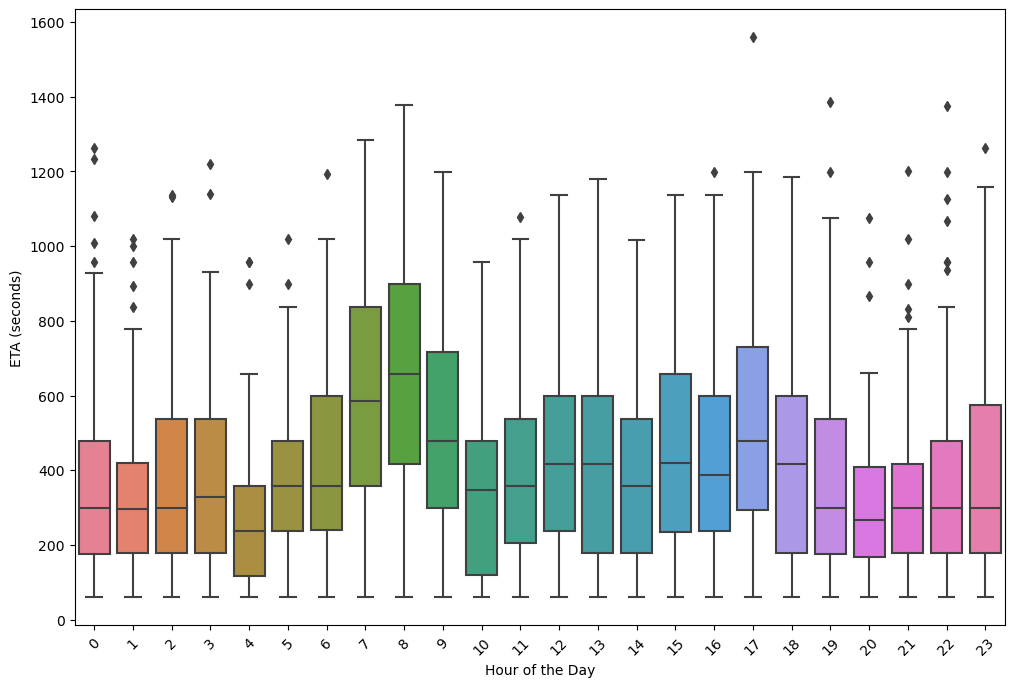

In [625]:
# Set the style
# sns.set(style="whitegrid")"husl"

# Plot the distribution of average ETA by hours using a boxplot"pastel"
plt.figure(figsize=(12, 8))
sns.boxplot(data=data_orders, x="hour", y="m_order_eta", palette="husl")
plt.xlabel('Hour of the Day')
plt.ylabel('ETA (seconds)')
# plt.title('Distribution of Average ETA by Hour')
plt.xticks(rotation=45)
plt.savefig('image/4_Distribution of Average ETA by Hour.png',bbox_inches='tight')
plt.show()

In [626]:
# # 绘制分布图
# plt.figure(figsize=(10, 6))

# # 使用 Seaborn 绘制折线图
# sns.lineplot(x="hour", y="m_order_eta", data=data_orders, marker='o', linestyle='-', color='skyblue')

# plt.xlabel('Hour of the Day')
# plt.ylabel('Average ETA (seconds)')
# plt.title('Average ETA by Hour')
# plt.xticks(range(24))
# # plt.grid(True, linestyle='--', alpha=0.5)
# plt.tight_layout()
# plt.show()

# 5 覆盖80%数据的图

In [627]:
import pandas as pd
import folium
import h3
import branca.colormap as cm

# 加载数据
data_orders = pd.read_csv('datasets/data_orders.csv')

# 将经纬度转换为 H3 六边形索引
data_orders['hex_id'] = data_orders.apply(lambda row: h3.geo_to_h3(row['origin_latitude'], row['origin_longitude'], 8), axis=1)

# 统计每个八边形中失败订单的数量
fail_counts = data_orders.groupby('hex_id').size().reset_index(name='fail_count')

# 创建颜色条
color_scale = cm.linear.RdBu_04.scale(fail_counts['fail_count'].min(), fail_counts['fail_count'].max())

# 计算失败订单总数
total_fails = fail_counts['fail_count'].sum()

# 计算累积失败订单数量超过80%的六边形
sorted_fail_counts = fail_counts.sort_values(by='fail_count', ascending=False)
cumulative_fails = 0
target_fails = total_fails * 0.8
target_hexes = []
for index, row in sorted_fail_counts.iterrows():
    cumulative_fails += row['fail_count']
    target_hexes.append(row['hex_id'])
    if cumulative_fails >= target_fails:
        break

# 将六边形可视化在地图上
m = folium.Map(location=[data_orders['origin_latitude'].mean(), data_orders['origin_longitude'].mean()], zoom_start=10)

# 在地图上添加填充颜色的八边形
for hex_id in target_hexes:
    lat, lon = h3.h3_to_geo(hex_id)
    fail_count = fail_counts[fail_counts['hex_id'] == hex_id]['fail_count'].iloc[0]
    fill_color = color_scale(fail_count)
    folium.RegularPolygonMarker(
        location=[lat, lon],
        fill_color=fill_color,
        color=fill_color,  # 边框颜色与填充颜色相同
        fill_opacity=0.8,  # 将填充颜色的透明度设为1，表示完全填充
        number_of_sides=6,  # 使用八边形
        radius=10  # 半径为10
    ).add_to(m)

# 添加颜色条
m.add_child(color_scale)

# 保存地图为 HTML 文件
m.save('hexagon_map.html')
num_colored_hexes = len(target_hexes)
print("The number of colored hexagons is:", num_colored_hexes)

The number of colored hexagons is: 24
